In [2]:
import pandas as pd

# Assuming your data is stored in a CSV file named 'data.csv'
file_path = 'F:\\prepinsta\\week3\\Week 3 - Data Cleaning (Pandas) - 2\\chipotle.tsv'
df = pd.read_csv(file_path, sep='\t')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [4]:

# Check for missing values
print(df.isnull().sum())


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [5]:
# Remove rows with missing values
df = df.dropna()

In [6]:
# Convert 'item_price' column to numeric after removing '$' and converting to float
df['item_price'] = df['item_price'].apply(lambda x: float(x.replace('$', '')))

In [7]:
# Display the cleaned dataframe
print(df.head())

   order_id  quantity         item_name  \
1         1         1              Izze   
2         1         1  Nantucket Nectar   
4         2         2      Chicken Bowl   
5         3         1      Chicken Bowl   
7         4         1     Steak Burrito   

                                  choice_description  item_price  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  


In [8]:

# Basic statistics on numerical columns
print(df.describe())

         order_id     quantity   item_price
count  3376.00000  3376.000000  3376.000000
mean    920.33205     1.063389     9.011321
std     528.96664     0.283070     3.791337
min       1.00000     1.000000     1.090000
25%     466.75000     1.000000     8.690000
50%     922.00000     1.000000     8.990000
75%    1382.25000     1.000000    11.250000
max    1834.00000     4.000000    35.250000


In [9]:
# 1. Missing Values
# Check for missing values in each column
print(df.isnull().sum())

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


In [10]:
# 2. Data Types
# Verify the data types of each column
print(df.dtypes)

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


In [11]:
# 3. Duplicated Entries
# Identify and handle duplicated entries
duplicated_entries = df[df.duplicated()]
print("Duplicated Entries:")
print(duplicated_entries)

Duplicated Entries:
      order_id  quantity            item_name  \
238        103         1        Steak Burrito   
248        108         1          Canned Soda   
297        129         1        Steak Burrito   
381        165         1    Canned Soft Drink   
484        205         1         Chicken Bowl   
567        233         1    Canned Soft Drink   
684        282         1    Canned Soft Drink   
773        319         1         Chicken Bowl   
908        376         1        Steak Burrito   
924        381         1   Chicken Soft Tacos   
1117       462         1      Chicken Burrito   
1203       491         1      Chicken Burrito   
1245       507         1    Canned Soft Drink   
1381       561         1    Canned Soft Drink   
1420       576         1        Barbacoa Bowl   
1421       576         1  Barbacoa Salad Bowl   
1502       610         1      Chicken Burrito   
1612       651         1                 Izze   
1791       724         1    Canned Soft Drink   


In [12]:
df = df.drop_duplicates(keep='first')


In [13]:
duplicated_entries = df[df.duplicated()]
print("Duplicated Entries after removal:")
print(duplicated_entries)

Duplicated Entries after removal:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


In [14]:
# 4. Quantity and Item Price
# Examine Quantity and Item Price columns
print("Quantity and Item Price Overview:")
print(df[['quantity', 'item_price']].describe())

Quantity and Item Price Overview:
          quantity   item_price
count  3335.000000  3335.000000
mean      1.064168     9.039520
std       0.284718     3.780434
min       1.000000     1.090000
25%       1.000000     8.690000
50%       1.000000     8.990000
75%       1.000000    11.250000
max       4.000000    35.250000


In [15]:
print("Unique Quantities:", df['quantity'].unique())
print("Unique Item Prices:", df['item_price'].unique())


Unique Quantities: [1 2 3 4]
Unique Item Prices: [ 3.39 16.98 10.98 11.75  9.25  8.75 11.25  8.49  2.18  8.99  1.09 22.5
 11.48 17.98 17.5   1.25 23.78  6.49 11.08 22.16 32.94 22.2  10.58  2.5
 23.5   7.4  18.5   6.78 11.89  9.39  3.75  8.69  8.19 35.   27.75 26.25
 21.96  4.36 22.96 26.07 12.98 35.25 33.75 16.38  5.    8.5  11.49]


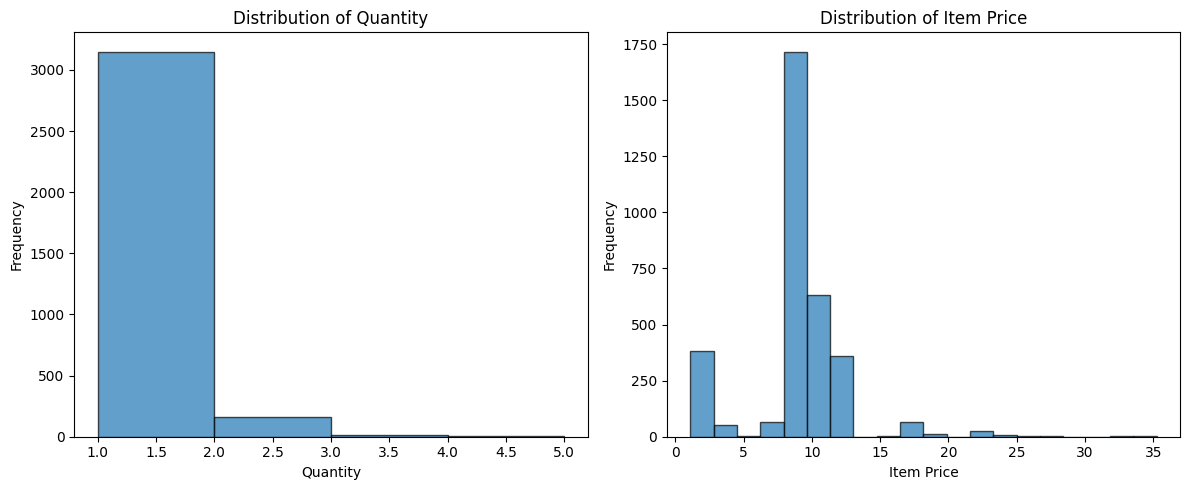

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram for Quantity
plt.subplot(1, 2, 1)
plt.hist(df['quantity'], bins=range(1, 6), edgecolor='black', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Histogram for Item Price
plt.subplot(1, 2, 2)
plt.hist(df['item_price'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import zscore

# Z-score for Quantity and Item Price
zscore_quantity = zscore(df['quantity'])
zscore_item_price = zscore(df['item_price'])

# Identify rows with outliers
outliers_quantity = df[abs(zscore_quantity) > 3]
outliers_item_price = df[abs(zscore_item_price) > 3]

print("Rows with Quantity Outliers:")
print(outliers_quantity)

print("Rows with Item Price Outliers:")
print(outliers_item_price)


Rows with Quantity Outliers:
      order_id  quantity           item_name  \
4            2         2        Chicken Bowl   
18           9         2         Canned Soda   
51          23         2         Canned Soda   
135         60         2  Chicken Salad Bowl   
148         67         2       Steak Burrito   
...        ...       ...                 ...   
4490      1786         4   Canned Soft Drink   
4491      1786         4   Canned Soft Drink   
4499      1789         2   Canned Soft Drink   
4560      1812         2   Canned Soft Drink   
4561      1813         2  Chicken Salad Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
18                                             [Sprite]        2.18  
51                                       [Mountain Dew]        2.18  
135   [Tomatillo Green Chili Salsa, [Sour Cream, Che...       22.50  
148   [Tomatillo-Red Chili Salsa (Hot), [Ric

In [18]:
# Filter rows with quantities greater than 1
quantity_outliers = df[df['quantity'] > 1]

# Display the rows with quantity outliers
print(quantity_outliers)


      order_id  quantity           item_name  \
4            2         2        Chicken Bowl   
18           9         2         Canned Soda   
51          23         2         Canned Soda   
135         60         2  Chicken Salad Bowl   
148         67         2       Steak Burrito   
...        ...       ...                 ...   
4490      1786         4   Canned Soft Drink   
4491      1786         4   Canned Soft Drink   
4499      1789         2   Canned Soft Drink   
4560      1812         2   Canned Soft Drink   
4561      1813         2  Chicken Salad Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
18                                             [Sprite]        2.18  
51                                       [Mountain Dew]        2.18  
135   [Tomatillo Green Chili Salsa, [Sour Cream, Che...       22.50  
148   [Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...       17.98  
...

In [19]:
# Keep only one instance of each item in cases where quantity > 1
df['quantity'] = df['quantity'].apply(lambda x: 1 if x > 1 else x)

# Display the updated DataFrame
print(df.head())


   order_id  quantity         item_name  \
1         1         1              Izze   
2         1         1  Nantucket Nectar   
4         2         1      Chicken Bowl   
5         3         1      Chicken Bowl   
7         4         1     Steak Burrito   

                                  choice_description  item_price  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  


In [20]:
from scipy.stats import zscore

# Z-score for Quantity and Item Price
zscore_quantity = zscore(df['quantity'])
zscore_item_price = zscore(df['item_price'])

# Identify rows with outliers
outliers_quantity = df[abs(zscore_quantity) > 3]
outliers_item_price = df[abs(zscore_item_price) > 3]

print("Rows with Quantity Outliers:")
print(outliers_quantity)

print("Rows with Item Price Outliers:")
print(outliers_item_price)


Rows with Quantity Outliers:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []
Rows with Item Price Outliers:
      order_id  quantity           item_name  \
135         60         1  Chicken Salad Bowl   
213         94         1  Chicken Salad Bowl   
281        123         1    Steak Salad Bowl   
353        152         1       Steak Burrito   
409        178         1        Chicken Bowl   
445        193         1                Bowl   
506        212         1       Carnitas Bowl   
549        229         1       Steak Burrito   
591        243         1  Chicken Salad Bowl   
613        253         1    Steak Salad Bowl   
633        261         1  Chicken Salad Bowl   
816        337         1  Chicken Salad Bowl   
864        357         1  Chicken Salad Bowl   
1110       459         1  Chicken Salad Bowl   
1254       511         1     Chicken Burrito   
1255       511         1       Steak Burrito   
1429       578         1 

In [21]:
from scipy.stats import zscore

# Calculate Z-scores for 'item_price'
df['item_price_zscore'] = zscore(df['item_price'])


In [22]:
# Set a Z-score threshold (e.g., 3 standard deviations)
zscore_threshold = 3

# Filter out rows with high Z-scores
df_no_outliers = df[(df['item_price_zscore'] > -zscore_threshold) & (df['item_price_zscore'] < zscore_threshold)].copy()

# Drop the temporary 'item_price_zscore' column
df_no_outliers = df_no_outliers.drop(columns=['item_price_zscore'])


Item Price Overview after removing outliers:
count    2777.000000
mean        9.702276
std         1.336070
min         5.000000
25%         8.750000
50%         9.250000
75%        11.250000
max        12.980000
Name: item_price, dtype: float64


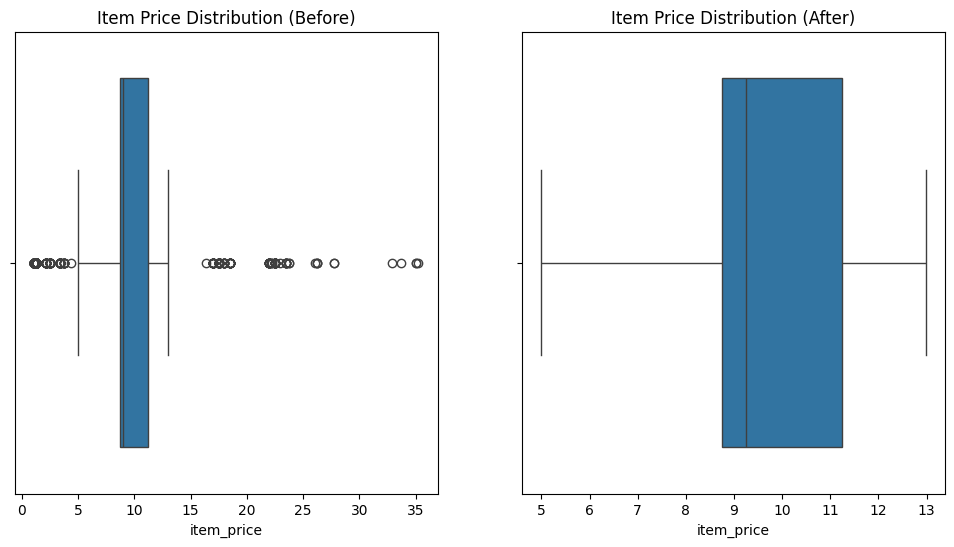

In [23]:
# Import necessary libraries
import pandas as pd

# Assuming your DataFrame is named 'df'

# Step 1: Calculate the IQR for 'item_price'
Q1 = df['item_price'].quantile(0.25)
Q3 = df['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out rows with item price outliers
df_no_outliers = df[(df['item_price'] >= lower_bound) & (df['item_price'] <= upper_bound)].copy()

# Display summary statistics after removing outliers
print("Item Price Overview after removing outliers:")
print(df_no_outliers['item_price'].describe())

# Optional: Visualize the distribution before and after removing outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['item_price'])
plt.title('Item Price Distribution (Before)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['item_price'])
plt.title('Item Price Distribution (After)')

plt.show()


In [26]:
# Assuming 'df' is your DataFrame
df['choice_description'] = df['choice_description'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


df['num_customizations'] = df['choice_description'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

unique_customizations = set()
df['choice_description'].apply(lambda x: unique_customizations.update(x.split(', ')) if isinstance(x, str) else None)


1       None
2       None
4       None
5       None
7       None
        ... 
4617    None
4618    None
4619    None
4620    None
4621    None
Name: choice_description, Length: 3335, dtype: object

In [28]:
# Convert 'choice_description' to string type
df['choice_description'] = df['choice_description'].astype(str)

# Replace NaN values with empty string
df['choice_description'] = df['choice_description'].replace('nan', '')


In [32]:
df = df.dropna(subset=['choice_description'])
df['choice_description'] = df['choice_description'].fillna('Default')


In [33]:
# Assuming 'df' is your DataFrame
df['choice_description'] = df['choice_description'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


df['num_customizations'] = df['choice_description'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

unique_customizations = set()
df['choice_description'].apply(lambda x: unique_customizations.update(x.split(', ')) if isinstance(x, str) else None)


1       None
2       None
4       None
5       None
7       None
        ... 
4617    None
4618    None
4619    None
4620    None
4621    None
Name: choice_description, Length: 3335, dtype: object

In [37]:
import pandas as pd
import re

# Assuming your DataFrame is named 'df'
# Replace 'item_name' and 'choice_description' with your actual column names

def check_special_characters(column_values):
    pattern = re.compile('[^a-zA-Z0-9\\s]')  # Updated regular expression to match non-alphanumeric characters and whitespace
    return [value for value in column_values if pattern.search(str(value))]

# Check special characters in 'item_name'
special_characters_in_item_name = check_special_characters(df['item_name'])

# Check special characters in 'choice_description'
special_characters_in_choice_description = check_special_characters(df['choice_description'])

# Display the results
print("Special characters in 'item_name':", special_characters_in_item_name)
print("Special characters in 'choice_description':", special_characters_in_choice_description)


Special characters in 'item_name': []
Special characters in 'choice_description': ['[Clementine]', '[Apple]', '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]', '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]', '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]', '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]', '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]', '[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]', '[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream]]', '[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]', '[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]]', '[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]', '[Sprite]', '[Tomatillo Red Chili Salsa, [Fajita V

In [38]:
import pandas as pd
import re

# Assuming your DataFrame is named 'df'
# Replace 'choice_description' with your actual column name

def clean_text(text):
    # Remove square brackets and commas
    cleaned_text = re.sub(r'[\[\],]', '', str(text))
    return cleaned_text

# Apply the clean_text function to the 'choice_description' column
df['choice_description'] = df['choice_description'].apply(clean_text)

# Display the DataFrame after cleaning
print(df)


      order_id  quantity           item_name  \
1            1         1                Izze   
2            1         1    Nantucket Nectar   
4            2         1        Chicken Bowl   
5            3         1        Chicken Bowl   
7            4         1       Steak Burrito   
...        ...       ...                 ...   
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   
4620      1834         1  Chicken Salad Bowl   
4621      1834         1  Chicken Salad Bowl   

                                     choice_description  item_price  \
1                                            Clementine        3.39   
2                                                 Apple        3.39   
4     Tomatillo-Red Chili Salsa (Hot) Black Beans Ri...       16.98   
5     Fresh Tomato Salsa (Mild) Rice Cheese Sour Cre...       10.98   
7     Tomatillo Red Chili Salsa Fajita Vegetables Bl...       11.75 

In [43]:
import pandas as pd
import re

def check_special_characters(column_values):
    pattern = re.compile('[^a-zA-Z0-9\\s]')  # Updated regular expression to match non-alphanumeric characters and whitespace
    return [value for value in column_values if pattern.search(str(value))]


# Check special characters in 'choice_description'
special_characters_in_choice_description = check_special_characters(df['choice_description'])

print("Special characters in 'choice_description':", special_characters_in_choice_description)


Special characters in 'choice_description': []


In [44]:
# Check for duplicates
duplicates = df[df.duplicated(subset=['order_id'], keep=False)]
print("Duplicate Order IDs:")
print(duplicates[['order_id', 'item_name']])

# Check for missing values
missing_values = df[df['order_id'].isnull()]
print("\nRows with Missing Order IDs:")
print(missing_values[['order_id', 'item_name']])

# Check for outliers
outliers = df[~df['order_id'].astype(str).str.isdigit()]
print("\nRows with Non-Integer Order IDs:")
print(outliers[['order_id', 'item_name']])

# Data type validation
df['order_id'] = pd.to_numeric(df['order_id'], errors='coerce')


Duplicate Order IDs:
      order_id             item_name
1            1                  Izze
2            1      Nantucket Nectar
7            4         Steak Burrito
8            4      Steak Soft Tacos
11           6  Chicken Crispy Tacos
...        ...                   ...
4617      1833         Steak Burrito
4618      1833         Steak Burrito
4619      1834    Chicken Salad Bowl
4620      1834    Chicken Salad Bowl
4621      1834    Chicken Salad Bowl

[2594 rows x 2 columns]

Rows with Missing Order IDs:
Empty DataFrame
Columns: [order_id, item_name]
Index: []

Rows with Non-Integer Order IDs:
Empty DataFrame
Columns: [order_id, item_name]
Index: []


In [48]:
import pandas as pd
import re

# Assuming df is your DataFrame

# Function to standardize text values
def standardize_text(text):
    if isinstance(text, str):
        # Remove non-alphanumeric characters
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return re.sub(pattern, '', text)
    else:
        return text

# Standardize values in text-based columns
text_columns = ['item_name', 'choice_description']
for column in text_columns:
    df[column] = df[column].apply(standardize_text)

# Display the updated DataFrame
print(df)


      order_id  quantity           item_name  \
1            1         1                izze   
2            1         1    nantucket nectar   
4            2         1        chicken bowl   
5            3         1        chicken bowl   
7            4         1       steak burrito   
...        ...       ...                 ...   
4617      1833         1       steak burrito   
4618      1833         1       steak burrito   
4619      1834         1  chicken salad bowl   
4620      1834         1  chicken salad bowl   
4621      1834         1  chicken salad bowl   

                                     choice_description  item_price  \
1                                            clementine        3.39   
2                                                 apple        3.39   
4     tomatillored chili salsa hot black beans rice ...       16.98   
5     fresh tomato salsa mild rice cheese sour cream...       10.98   
7     tomatillo red chili salsa fajita vegetables bl...       11.75 

count    3335.000000
mean        9.039520
std         3.780434
min         1.090000
25%         8.690000
50%         8.990000
75%        11.250000
max        35.250000
Name: total_price, dtype: float64


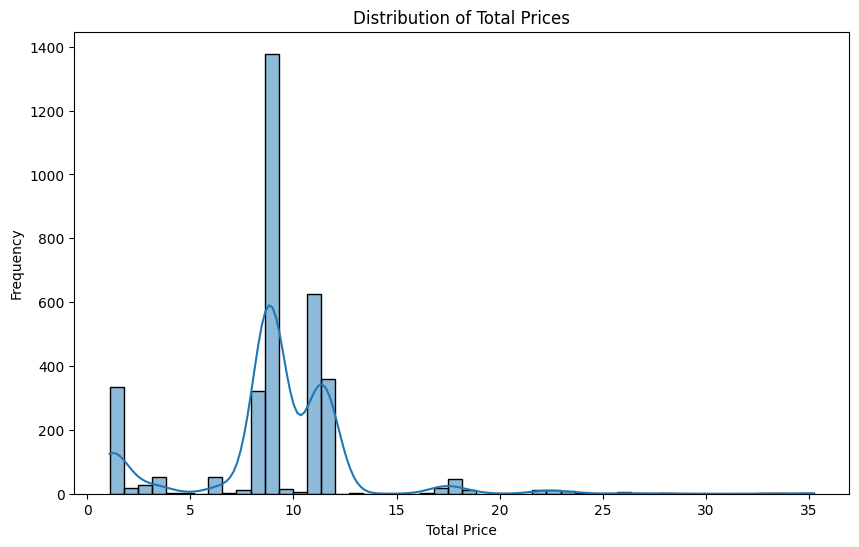

In [49]:
# Calculate total price for each item
df['total_price'] = df['quantity'] * df['item_price']

# Display summary statistics of total prices
total_price_stats = df['total_price'].describe()
print(total_price_stats)

# Visualize the distribution of total prices (you can use a histogram or other plots)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['total_price'], bins=50, kde=True)
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


In [50]:
df['calculated_total_price'] = df['quantity'] * df['item_price']


In [51]:
price_discrepancies = df[df['calculated_total_price'] != df['total_price']]


In [52]:
description_discrepancies = df[df['choice_description'].notna() & (df['choice_description'] != df['item_name'])]


In [54]:
# Assuming your cleaned DataFrame is named 'cleaned_data'
df.to_csv('cleaned_data.csv', sep=',', index=False)


In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'item_name' column
df['item_name_encoded'] = label_encoder.fit_transform(df['item_name'])
print(df.head())


   order_id  quantity         item_name  \
1         1         1              izze   
2         1         1  nantucket nectar   
4         2         1      chicken bowl   
5         3         1      chicken bowl   
7         4         1     steak burrito   

                                  choice_description  item_price  \
1                                         clementine        3.39   
2                                              apple        3.39   
4  tomatillored chili salsa hot black beans rice ...       16.98   
5  fresh tomato salsa mild rice cheese sour cream...       10.98   
7  tomatillo red chili salsa fajita vegetables bl...       11.75   

   item_price_zscore  choice_description_code  num_customizations  \
1          -1.494634                       12                   1   
2          -1.494634                        5                   1   
4           2.100730                      848                   5   
5           0.513372                      100           

In [59]:
cleaned_data=pd.read_csv("F:\\prepinsta\\week3\\Week 3 - Data Cleaning (Pandas) - 2\\cleaned_data.csv")
print(cleaned_data[['quantity', 'item_price']].head())


   quantity  item_price
0         1        3.39
1         1        3.39
2         1       16.98
3         1       10.98
4         1       11.75
